In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Comp ML/Assessment-1/Obesity Classification/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [5]:
features = list(df.columns[:-1])
features_dtype = list(df.dtypes[:-1])

## Print unique classes with count of data points for categorical features and dependent variable

In [6]:
object_type_cols = list(df.select_dtypes('object'))
for i in range(len(object_type_cols)):
  print(df[object_type_cols[i]].value_counts())
  print()

Male      1068
Female    1043
Name: Gender, dtype: int64

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

yes    1866
no      245
Name: FAVC, dtype: int64

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

no     2067
yes      44
Name: SMOKE, dtype: int64

no     2015
yes      96
Name: SCC, dtype: int64

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64



## Plot Distribution among different classes for all categorical features and dependent variable

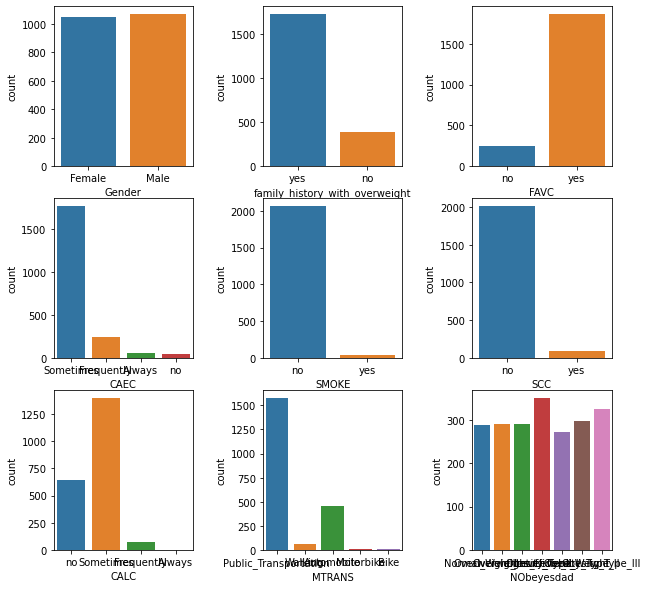

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(object_type_cols):
  sns.countplot(x = col, data=df, ax = axes[i])

Almost equal distribution of data points in all 7 classes of dependent variable 'NObeyesdad'

## Feature Correlation

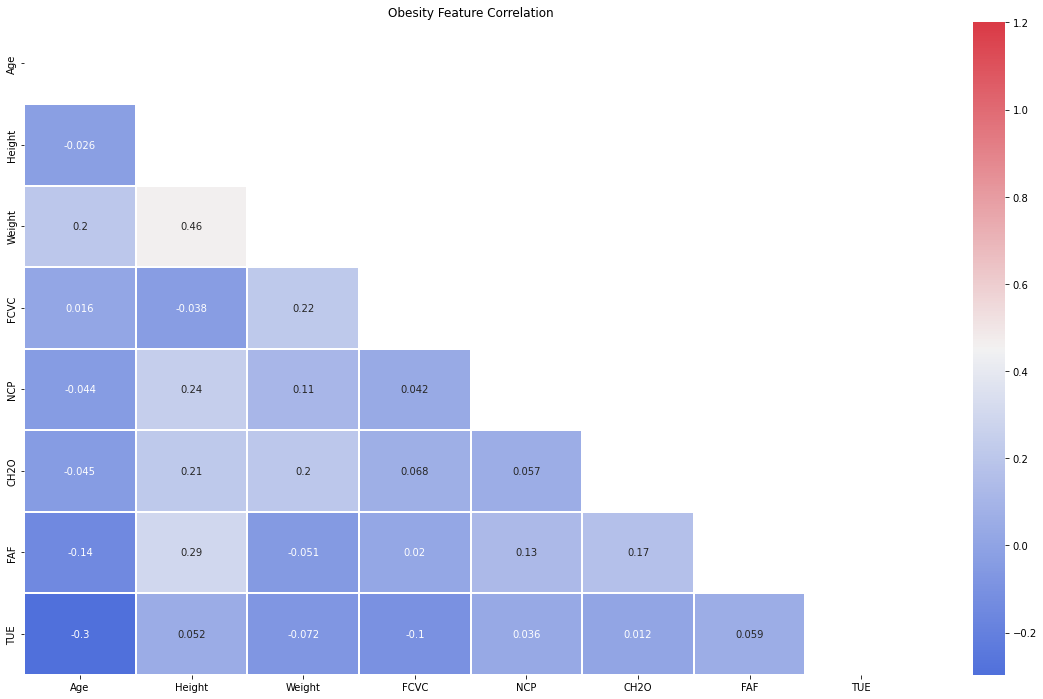

In [9]:
corrMatt = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Obesity Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=1);

No numerical features are highly correlated

## Find correlation after one hot encoding

In [10]:
df_onehot_encoded = df.copy()

object_cols = list(df_onehot_encoded.select_dtypes('object'))
object_cols_multiclass = []
object_cols_binaryclass = []
for i in range(len(object_cols)-1) : #don't include 'NObeyesdad' since it's not independent variable
  if len(df[object_cols[i]].unique())>2:
    object_cols_multiclass.append(object_cols[i])
  else : 
    object_cols_binaryclass.append(object_cols[i])

df_onehot_encoded = pd.get_dummies(df, columns = object_cols_multiclass)



from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(len(object_cols_binaryclass)):  
  df_onehot_encoded[object_cols_binaryclass[i]] = le.fit_transform(df_onehot_encoded[object_cols_binaryclass[i]])

df_onehot_encoded = df_onehot_encoded[[c for c in df_onehot_encoded if c not in ['NObeyesdad']] 
       + ['NObeyesdad']]

df_onehot_encoded.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  SMOKE  CH2O  ...  CALC_Always  CALC_Frequently  CALC_Sometimes  \
0  3.0      0   2.0  ...            0                0               0   
1  3.0      1   3.0  ...            0                0               1   
2  3.0      0   2.0  ...            0                1               0   
3  3.0      0   2.0  ...            0                1               0   
4  1.0      0   2.0  ...            0                0               1   

   CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0        1                  0            0                 0   
1        0                  0            0                 0   
2        0                  0            0                 0   
3        0                  0            0                 0   
4        0                  0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking           NObeyesdad  
0                             1               0        Normal_Weight  
1                             1               0        Normal_Weight  
2                             1               0        Normal_Weight  
3                             0               1   Overweight_Level_I  
4                             1               0  Overweight_Level_II  

[5 rows x 27 columns]

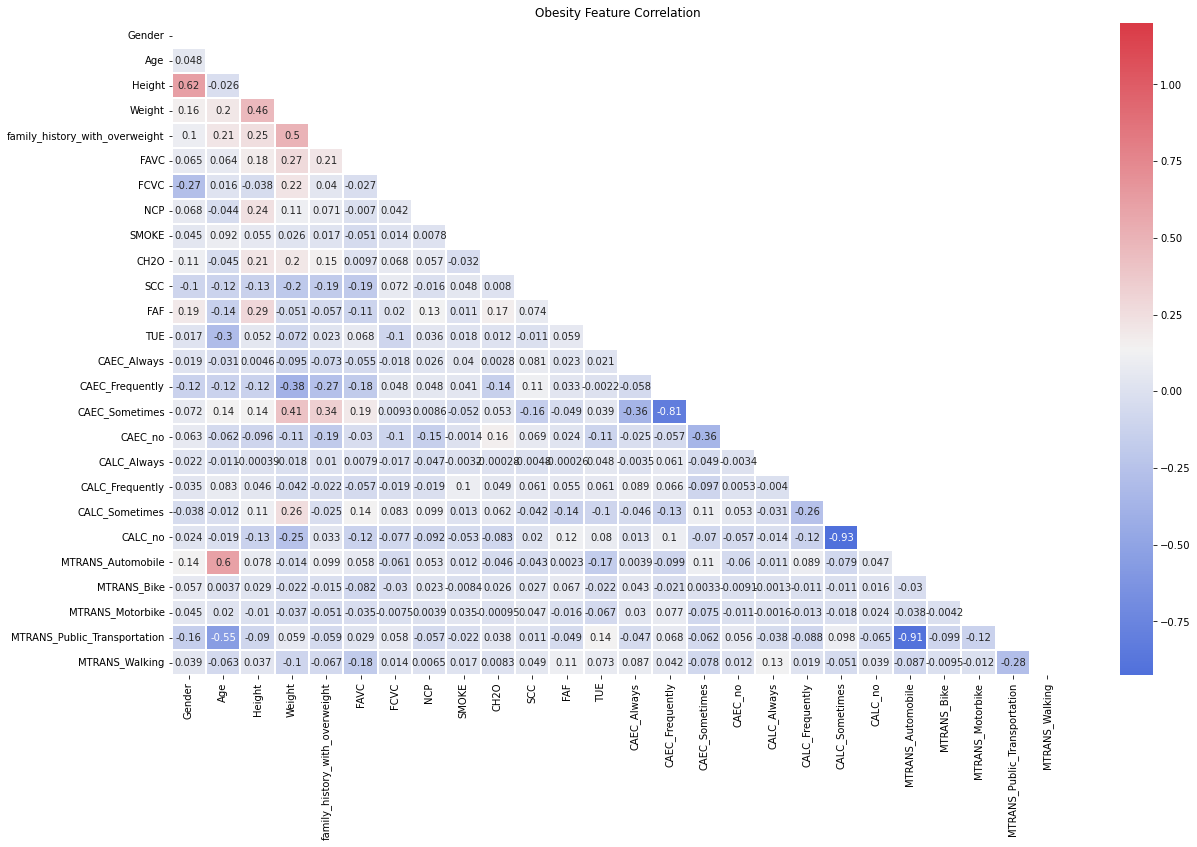

In [11]:
corrMatt = df_onehot_encoded.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Obesity Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=1)

## Box Plot

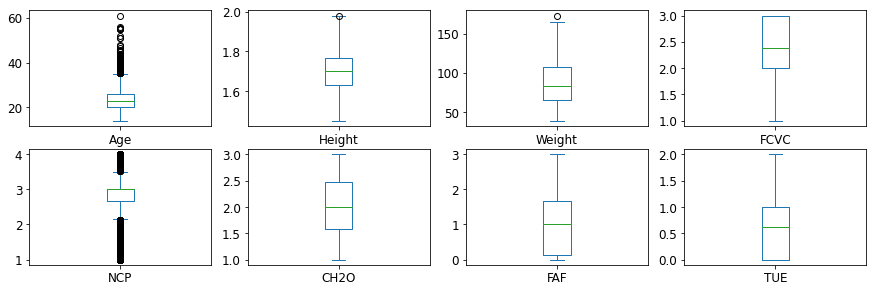

In [12]:
data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, fontsize=12, figsize=(15,20));

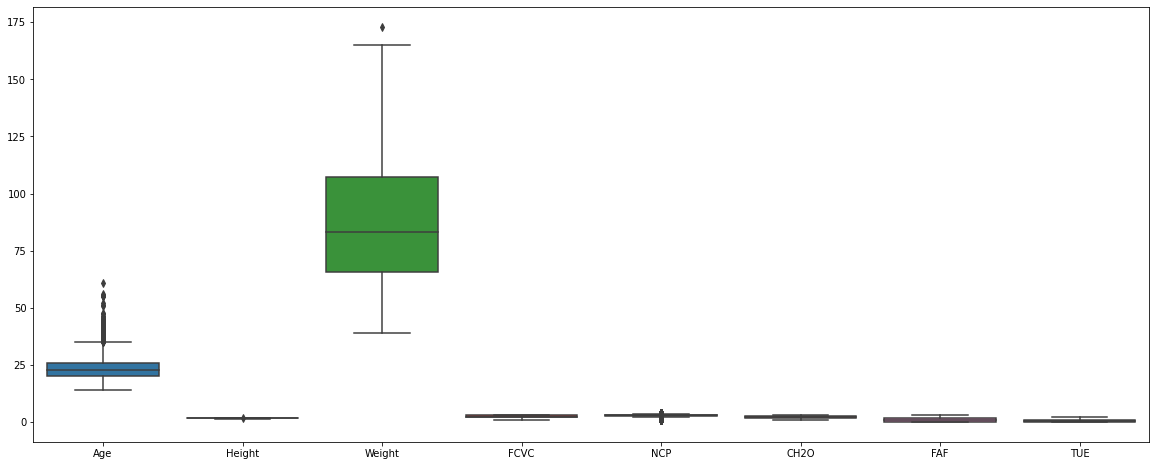

In [13]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=df.iloc[:, :],ax=ax)

Ranges for Age and Weight are very different from ranges for other features

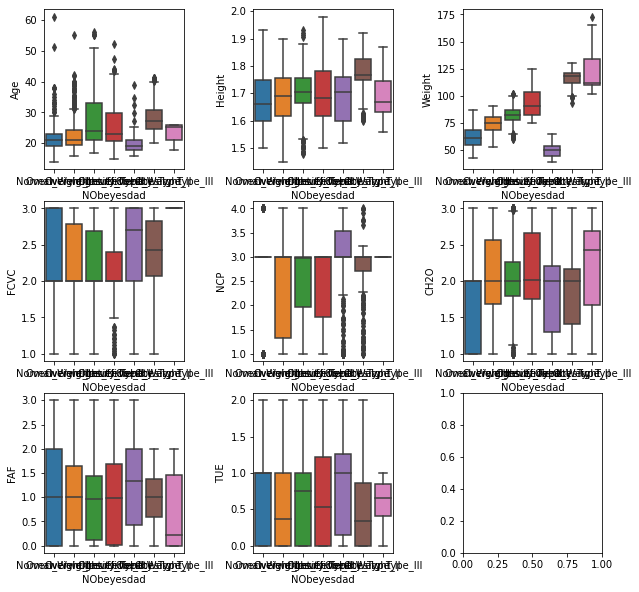

In [14]:
#Boxplot of numerical features only

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()

counter = 0
cols_type = list(df.dtypes)
cols = list(df.columns)
for i, col in enumerate(cols_type[:-1]):
  if cols_type[i] != 'object' :
    _= sns.boxplot(y=cols[i], x='NObeyesdad', data=df, ax=axes[counter])
    counter = counter + 1

Weight looks like a good indicator for different classes of NObeyesdad. Age also looks fine. Height and NCP also look decent.

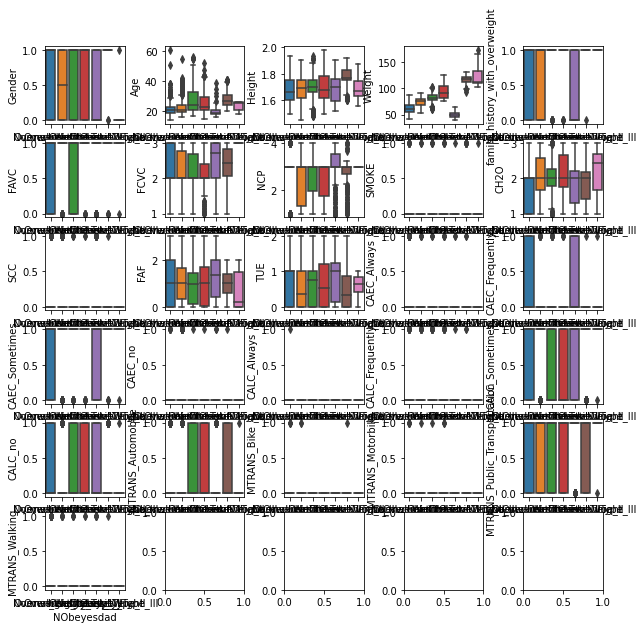

In [15]:
#Boxplot of numerical features + categorical features after one hot encoding

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(10,10))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()

counter = 0
cols_type = list(df_onehot_encoded.dtypes)
cols = list(df_onehot_encoded.columns)
for i, col in enumerate(cols_type):
  if cols_type[i] != 'object' :
    _= sns.boxplot(y=cols[i], x='NObeyesdad', data=df_onehot_encoded, ax=axes[counter])
    counter = counter + 1

Following columns might be useful for classification based on the boxplot above

1.   Weight
2.   Family history with overweight
3.   FAVC
4.   CAEC_Frequently
5.   CAEC_Sometimes
6.   CALC_Sometimes
7.   CALC_no
8.   MTrans_automobile
9.   MTrans_Public_Transport
10.  Age
11.  Height


## PairPlot

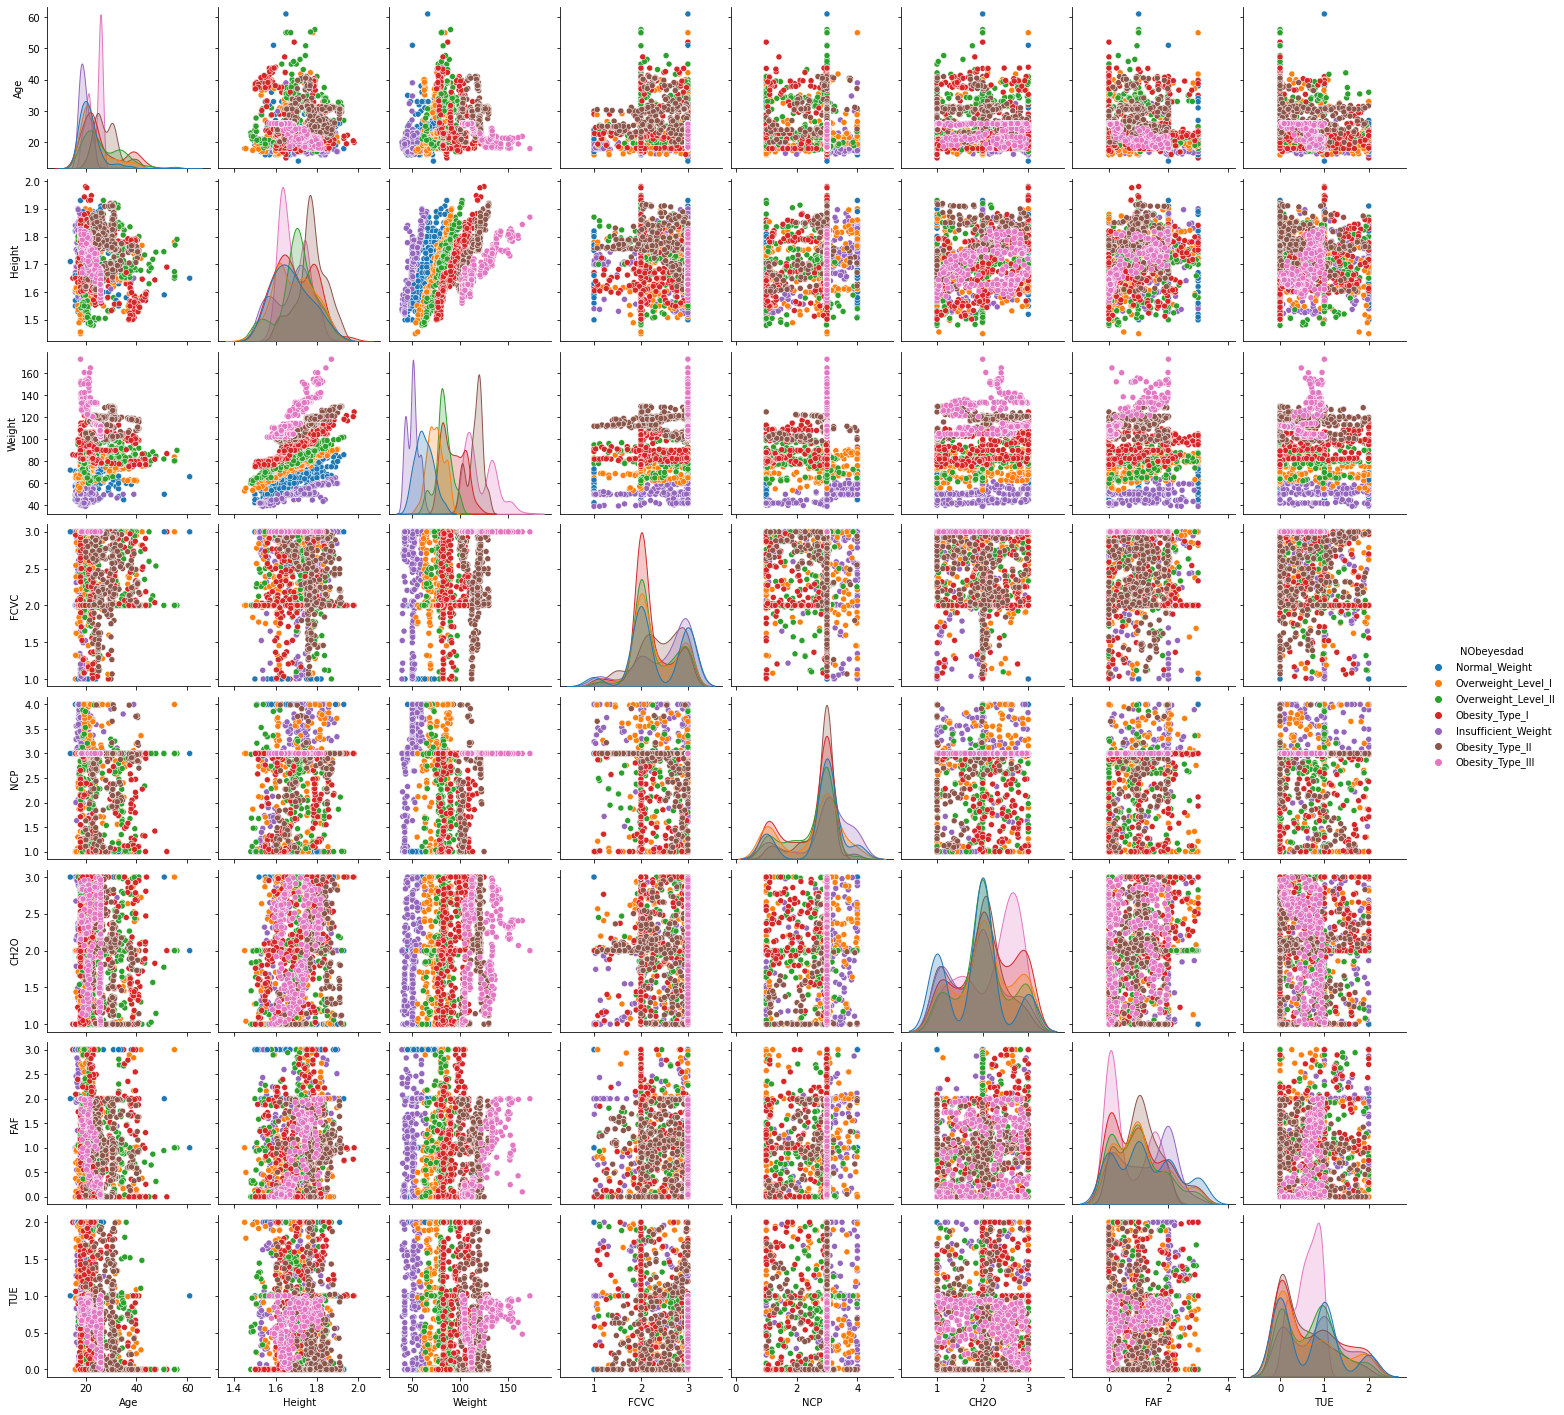

In [16]:
#pairplot original data
sns.pairplot(df[list(df.columns[:-1]) + ['NObeyesdad']], hue="NObeyesdad")

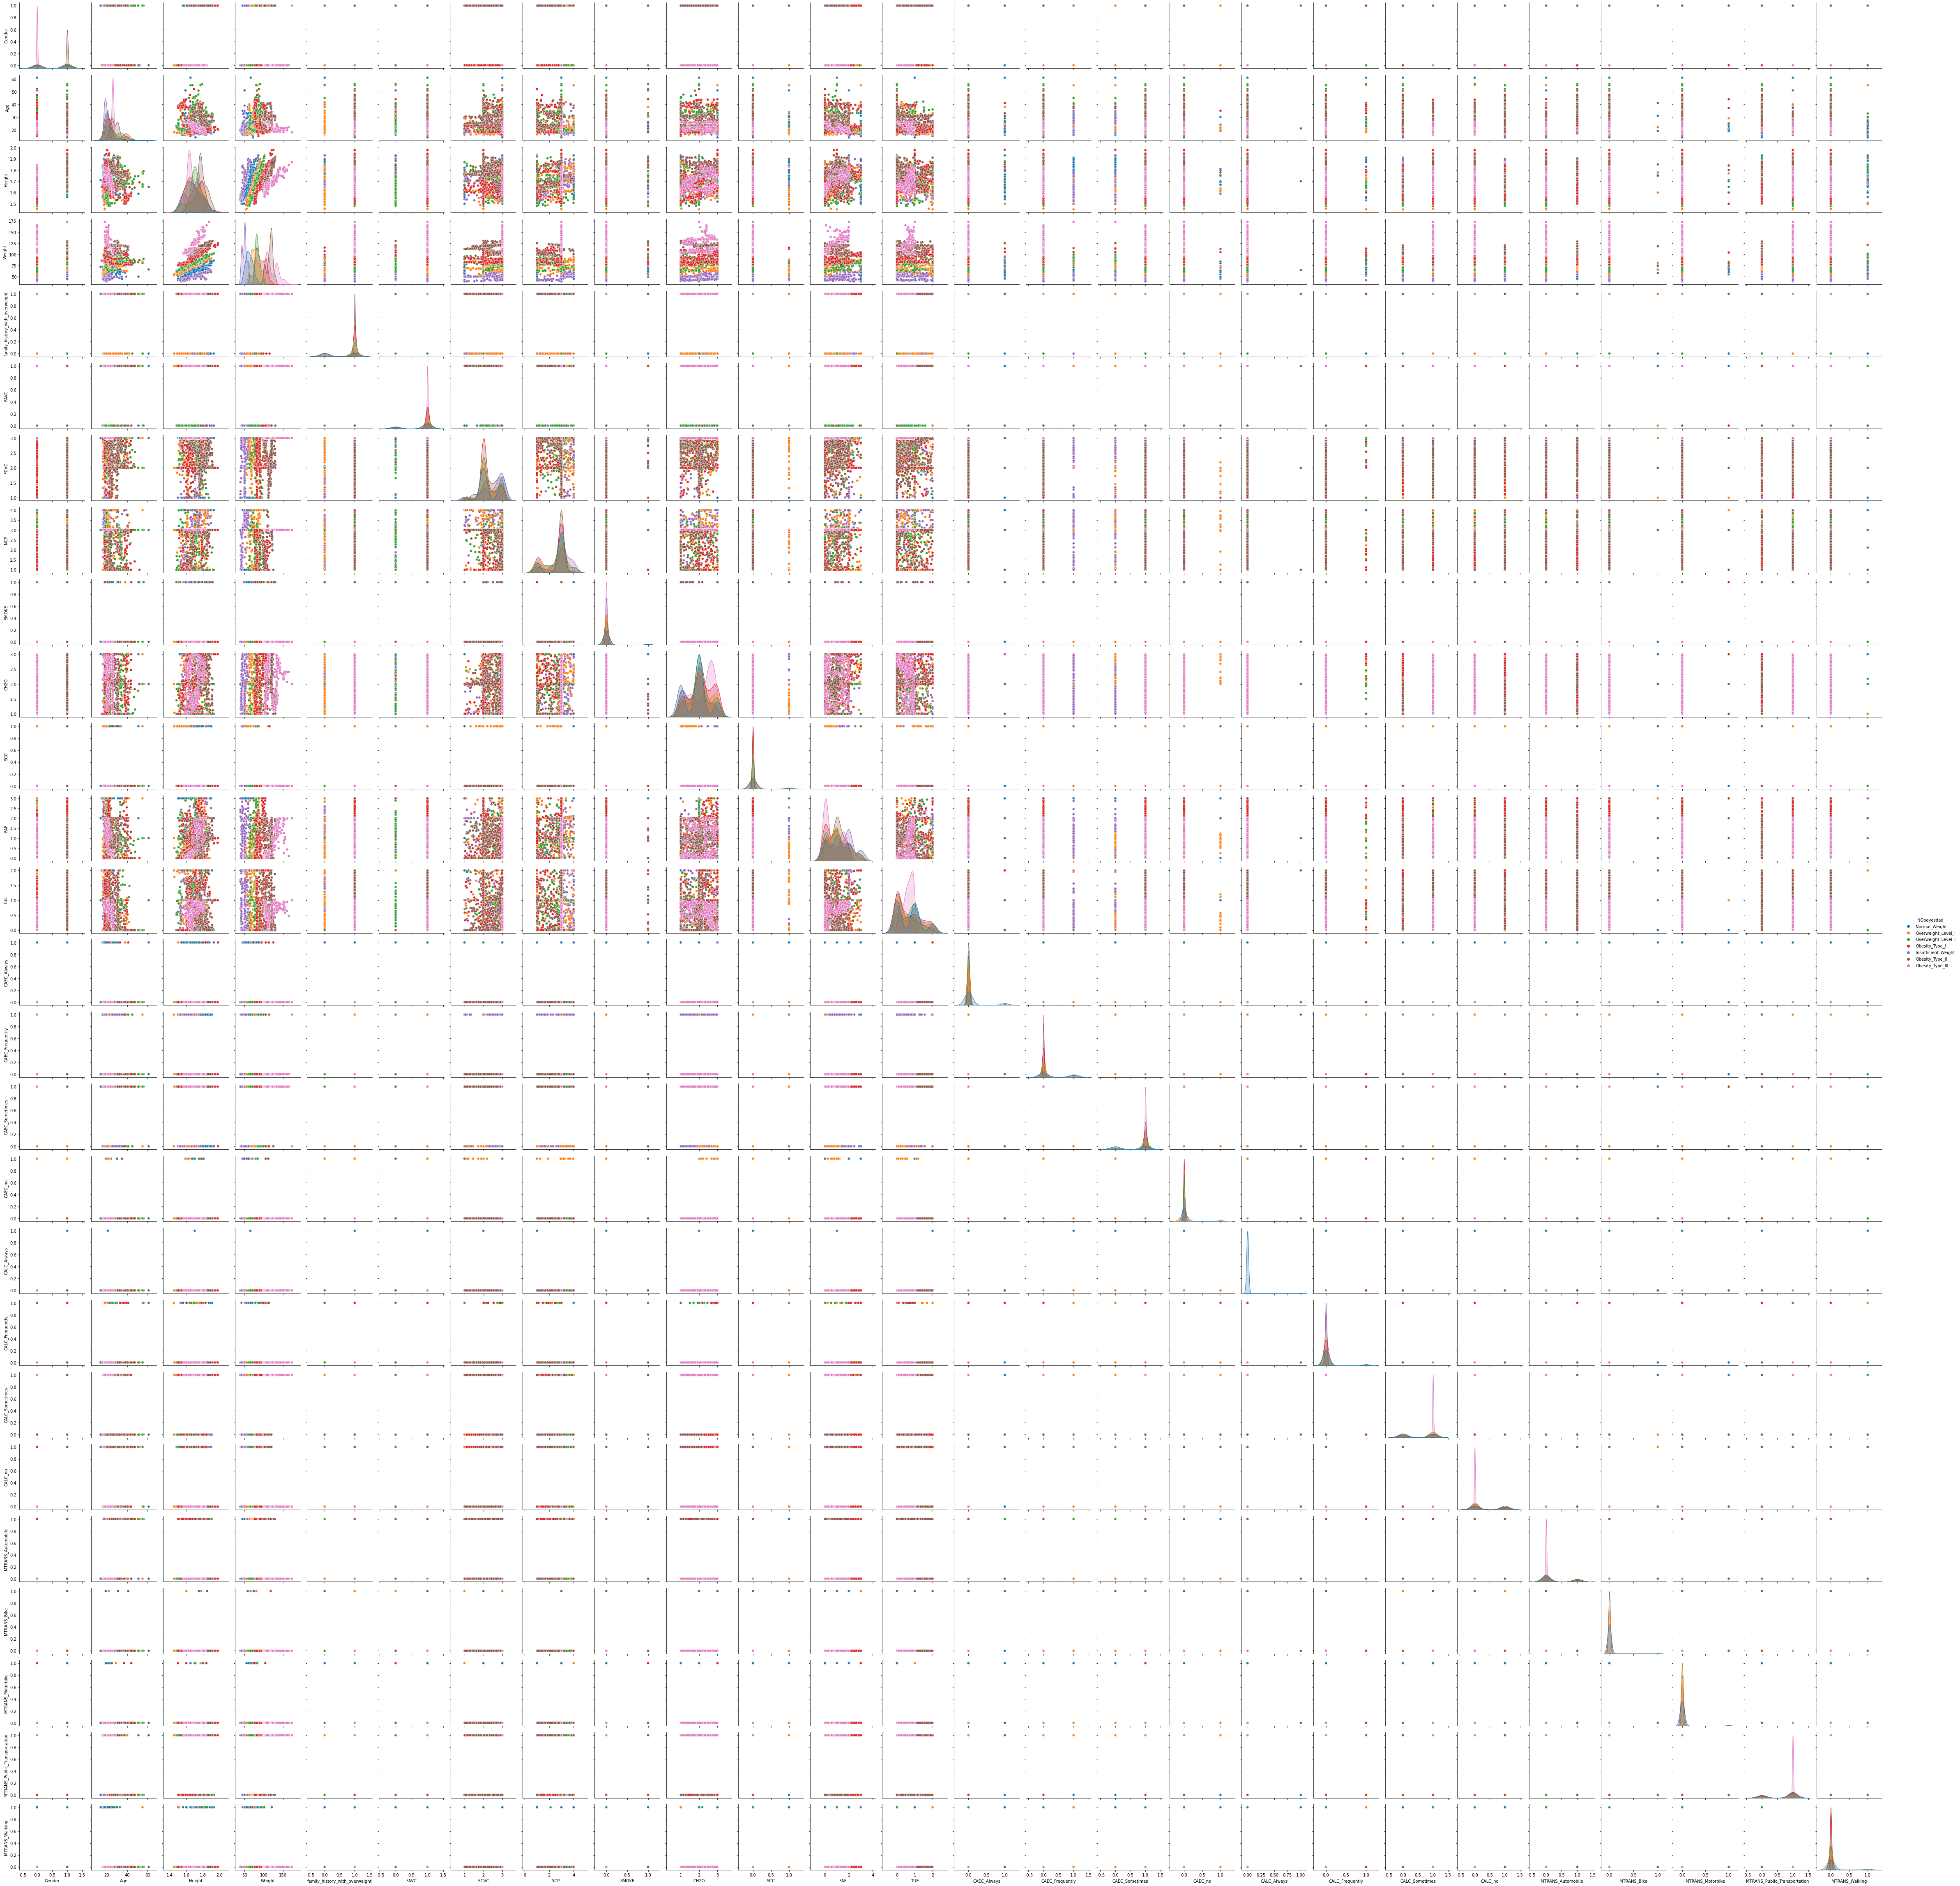

In [17]:
#pairplot data after applying one hot encoding
sns.pairplot(df_onehot_encoded[list(df_onehot_encoded.columns[:-1]) + ['NObeyesdad']], hue="NObeyesdad")

In [22]:
print(df_onehot_encoded.info())
df_onehot_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SMOKE                           2111 non-null   int64  
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   int64  
 11  FAF                             2111 non-null   float64
 12  TUE                             21

Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921    24.312600     1.701677    86.586058   
std       0.500083     6.345968     0.093305    26.191172   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.947192     1.630000    65.473343   
50%       1.000000    22.777890     1.700499    83.000000   
75%       1.000000    26.000000     1.768464   107.430682   
max       1.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.817622     0.883941     2.419043     2.685628   
std                          0.386247     0.320371     0.533927     0.778039   
min                          0.000000     0.000000     1.000000     1.000000   
25%                          1.000000     1.000000     2.000000     2.658738   
50%                          1.000000     1.000000     2.385502     3.000000   
75%                          1.000000     1.000000     3.000000     3.000000   
max                          1.000000     1.000000     3.000000     4.000000   

             SMOKE         CH2O  ...      CAEC_no  CALC_Always  \
count  2111.000000  2111.000000  ...  2111.000000  2111.000000   
mean      0.020843     2.008011  ...     0.024159     0.000474   
std       0.142893     0.612953  ...     0.153580     0.021765   
min       0.000000     1.000000  ...     0.000000     0.000000   
25%       0.000000     1.584812  ...     0.000000     0.000000   
50%       0.000000     2.000000  ...     0.000000     0.000000   
75%       0.000000     2.477420  ...     0.000000     0.000000   
max       1.000000     3.000000  ...     1.000000     1.000000   

       CALC_Frequently  CALC_Sometimes      CALC_no  MTRANS_Automobile  \
count      2111.000000     2111.000000  2111.000000        2111.000000   
mean          0.033160        0.663667     0.302700           0.216485   
std           0.179096        0.472566     0.459535           0.411946   
min           0.000000        0.000000     0.000000           0.000000   
25%           0.000000        0.000000     0.000000           0.000000   
50%           0.000000        1.000000     0.000000           0.000000   
75%           0.000000        1.000000     1.000000           0.000000   
max           1.000000        1.000000     1.000000           1.000000   

       MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
count  2111.000000       2111.000000                   2111.000000   
mean      0.003316          0.005211                      0.748460   
std       0.057502          0.072015                      0.434001   
min       0.000000          0.000000                      0.000000   
25%       0.000000          0.000000                      0.000000   
50%       0.000000          0.000000                      1.000000   
75%       0.000000          0.000000                      1.000000   
max       1.000000          1.000000                      1.000000   

       MTRANS_Walking  
count     2111.000000  
mean         0.026528  
std          0.160737  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 26 columns]

##Normalization

In [23]:
object_cols = list(df_onehot_encoded.select_dtypes('float64'))
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_onehot_encoded[object_cols] = min_max_scaler.fit_transform(df_onehot_encoded[object_cols])
df_onehot_encoded.head()

Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0  0.148936  0.320755  0.186567                               1     0   
1       0  0.148936  0.132075  0.126866                               1     0   
2       1  0.191489  0.660377  0.283582                               1     0   
3       1  0.276596  0.660377  0.358209                               0     0   
4       1  0.170213  0.622642  0.379104                               0     0   

   FCVC       NCP  SMOKE  CH2O  ...  CALC_Always  CALC_Frequently  \
0   0.5  0.666667      0   0.5  ...            0                0   
1   1.0  0.666667      1   1.0  ...            0                0   
2   0.5  0.666667      0   0.5  ...            0                1   
3   1.0  0.666667      0   0.5  ...            0                1   
4   0.5  0.000000      0   0.5  ...            0                0   

   CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0               0        1                  0            0                 0   
1               1        0                  0            0                 0   
2               0        0                  0            0                 0   
3               0        0                  0            0                 0   
4               1        0                  0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking           NObeyesdad  
0                             1               0        Normal_Weight  
1                             1               0        Normal_Weight  
2                             1               0        Normal_Weight  
3                             0               1   Overweight_Level_I  
4                             1               0  Overweight_Level_II  

[5 rows x 27 columns]

##Splitting of dataset

In [24]:
from sklearn.model_selection import train_test_split

X = df_onehot_encoded.iloc[: , :-1].values
print(X.shape)
Y = df_onehot_encoded.iloc[: , -1].values
print(Y.shape)
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y, test_size=0.20)
print(Y_train.shape)
print(X_train.shape)

(2111, 26)
(2111,)
(1688,)
(1688, 26)


##SVM CODE AFTER THIS BUT WE CAN USE THE CODE FOR CONFUSION MATRIX AND EVALUATION MEASURES

In [26]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')
SVM.fit(X_train , Y_train)

SVC(kernel='linear')

In [28]:
Y_pred = SVM.predict(X_test)

##Plot confusion matrix

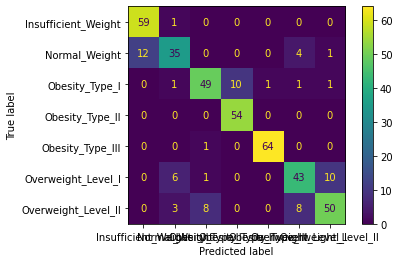

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVM.classes_)
disp.plot()
plt.show()

##Metrics

In [37]:
from sklearn import metrics
from sklearn.metrics import classification_report, matthews_corrcoef
print(classification_report(Y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.98      0.90        60
      Normal_Weight       0.76      0.67      0.71        52
     Obesity_Type_I       0.83      0.78      0.80        63
    Obesity_Type_II       0.84      1.00      0.92        54
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.77      0.72      0.74        60
Overweight_Level_II       0.81      0.72      0.76        69

           accuracy                           0.84       423
          macro avg       0.83      0.84      0.83       423
       weighted avg       0.83      0.84      0.83       423



##These evaluations work on confusion matrix for binary classification

In [40]:
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
specificity = tn/(tn+fp)
fpr = 1-specificity
fnr = fn/(fn+tp)
npv = tn/(tn+fn)
fdr = fp/(fp+tp)
mcc=matthews_corrcoef(Y_test, y_pred)
print("specificity =",specificity)
print("fpr = ",fpr)
print("fnr = ",fnr)
print("npv = ",npv)
print("fdr = ",fdr)
print("mcc = ",mcc)

specificity = 0.9833333333333333
fpr =  0.01666666666666672
fnr =  0.2553191489361702
npv =  0.8309859154929577
fdr =  0.027777777777777776
mcc =  0.8104291954105223


#Some article on google said this is how you use SVM for multiclass classification

In [ ]:
from sklearn.svm import SVC
svm = SVC(decision_function_shape='ovo')
svm.fit(X_Train, Y_Train.values.ravel())
y_pred = svm.predict(X_test)
#Repeat the confusion matrix and evaluation measures from the cells right above this
#decision_function_shape='ovo'. HERE ovo means one versus one